![example](images/director_shot.jpeg)

# Movie Analysis

**Authors:** Justin Hue
***

## Overview

This notebook will dive into which successful films a business interested in creating original movies should look into emulating. This notebook will give insight into what genres of films are most successful, what kinds of films are the highest rated, as well as which of the top films of the last decade are the highest grossing. With this information, a business would have actionable, tangible insights that they will be able to put to use in a multitude of ways.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
* We have 2 tables from IMDB, which include basic information about each title as well as the ratings each film received, as well as the amount of votes casted to rate each film.
* This data represents the most successful movies over a recent time period (about the last 10 years).
* The target variable here is the average rating of the movies cross-referenced with the number of votes the films received. We want to make sure the movie was well received by a large audience.
***

In [16]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-poster')
%matplotlib inline
! ls

DS_Project_Presentation.pdf
Movie-Analysis.ipynb
README.md
TEMPLATE_README.md
data
images


In [17]:
df1 = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz', header=0, encoding='latin-1')
df2 = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz', header=0, encoding='latin-1')
df3 = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz', header=0, encoding='latin-1')
df1.drop_duplicates()
df2.drop_duplicates()
df3.sort_values(['domestic_gross'],ascending = False).head(50)
df3.groupby('studio')
df3.groupby(df3['studio'])
studio_earnings = df3.groupby('studio').sum().sort_values(by = 'domestic_gross').tail(20).drop(columns='year')

In [38]:
df3.groupby('studio').sum().sort_values(by='domestic_gross', ascending = False).head(20).drop(columns='year')

,domestic_gross
studio,
BV,1.841903e+10
Uni.,1.290239e+10
WB,1.216805e+10
Fox,1.094950e+10
Sony,8.459683e+09
Par.,7.685871e+09
LGF,4.118963e+09
WB (NL),3.995700e+09
LG/S,2.078200e+09


Based on the table above, we learned that the top 5 grossing studios in movies are: Disney, Universal, Warner Bros., Fox, and Sony.

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [19]:
df3

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [20]:
joined_df = pd.merge(df1, df2, on='tconst', how='inner')
joined_df = pd.merge(joined_df, df3, left_on=['original_title', 'start_year'],
                     right_on=['title', 'year'])
joined_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000,2012
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,"1,019.4",2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Nobody's Fool,Par.,31700000.0,1800000,2018
1636,tt8108198,Andhadhun,Andhadhun,2018,139.0,"Crime,Thriller",8.5,43409,Andhadhun,Eros,1200000.0,NaN,2018
1637,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Helicopter Eela,Eros,72000.0,NaN,2018
1638,tt8549902,Oolong Courtyard: KungFu School,Oolong Courtyard,2018,103.0,Comedy,4.6,61,Oolong Courtyard,CL,37700.0,NaN,2018


In [21]:
joined_df.isna().sum()

tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes      4
genres               2
averagerating        0
numvotes             0
title                0
studio               2
domestic_gross      10
foreign_gross      450
year                 0
dtype: int64

In [22]:
# joined_df[joined_df['runtime_minutes'].isna()]

In [23]:
joined_df = joined_df.dropna(subset=['runtime_minutes', 'domestic_gross', 'genres', 'studio'])

In [24]:
joined_df = joined_df.fillna(0)
joined_df = joined_df.drop(columns = 'foreign_gross')
joined_df.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
title              0
studio             0
domestic_gross     0
year               0
dtype: int64

In [25]:
#extracting separate genres
test_genre = joined_df.loc[719, 'genres']
test_genre

'Action,Adventure,Sci-Fi'

In [26]:
test_genre.split(',')

['Action', 'Adventure', 'Sci-Fi']

In [37]:
joined_df['genres_list'] = joined_df['genres'].map(lambda x :x.split(','))
genre_df = joined_df.explode('genres_list')
genre_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,year,genres_list
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,2012,Adventure
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,2012,Drama
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,2012,Romance
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,2013,Adventure
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,2013,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Nobody's Fool,Par.,31700000.0,2018,Drama
1635,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Nobody's Fool,Par.,31700000.0,2018,Romance
1636,tt8108198,Andhadhun,Andhadhun,2018,139.0,"Crime,Thriller",8.5,43409,Andhadhun,Eros,1200000.0,2018,Crime
1636,tt8108198,Andhadhun,Andhadhun,2018,139.0,"Crime,Thriller",8.5,43409,Andhadhun,Eros,1200000.0,2018,Thriller


In [28]:
joined_df.sort_values(['domestic_gross'], ascending = False).head(20)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,year,genres_list
719,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148,Black Panther,BV,700100000.0,2018,"[Action, Adventure, Sci-Fi]"
1362,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,Avengers: Infinity War,BV,678800000.0,2018,"[Action, Adventure, Sci-Fi]"
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,2015,"[Action, Adventure, Sci-Fi]"
1269,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",7.7,203510,Incredibles 2,BV,608600000.0,2018,"[Action, Adventure, Animation]"
952,tt2277860,Finding Dory,Finding Dory,2016,97.0,"Adventure,Animation,Comedy",7.3,213542,Finding Dory,BV,486300000.0,2016,"[Adventure, Animation, Comedy]"
1027,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,Avengers: Age of Ultron,BV,459000000.0,2015,"[Action, Adventure, Sci-Fi]"
321,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769,The Dark Knight Rises,WB,448100000.0,2012,"[Action, Thriller]"
786,tt1951264,The Hunger Games: Catching Fire,The Hunger Games: Catching Fire,2013,146.0,"Action,Adventure,Sci-Fi",7.5,575455,The Hunger Games: Catching Fire,LGF,424700000.0,2013,"[Action, Adventure, Sci-Fi]"
1454,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",6.2,219125,Jurassic World: Fallen Kingdom,Uni.,417700000.0,2018,"[Action, Adventure, Sci-Fi]"
17,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,Toy Story 3,BV,415000000.0,2010,"[Adventure, Animation, Comedy]"


In [29]:
top_studios = joined_df['studio'].value_counts().head(10).index

In [32]:
joined_df = joined_df[joined_df['studio'].isin(top_studios)]
highest_gross = joined_df.sort_values(by='domestic_gross', ascending = False)
highest_rating = joined_df.sort_values(by='averagerating', ascending = False)
highest_rating

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,year,genres_list
337,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Inception,WB,292600000.0,2010,"[Action, Adventure, Sci-Fi]"
1477,tt5787344,Dancer,Dancer,2016,55.0,Action,8.6,11,Dancer,IFC,71900.0,2016,[Action]
71,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,Interstellar,Par.,188000000.0,2014,"[Adventure, Drama, Sci-Fi]"
1636,tt8108198,Andhadhun,Andhadhun,2018,139.0,"Crime,Thriller",8.5,43409,Andhadhun,Eros,1200000.0,2018,"[Crime, Thriller]"
1362,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,Avengers: Infinity War,BV,678800000.0,2018,"[Action, Adventure, Sci-Fi]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,tt4877122,The Emoji Movie,The Emoji Movie,2017,86.0,"Adventure,Animation,Comedy",3.2,47294,The Emoji Movie,Sony,86100000.0,2017,"[Adventure, Animation, Comedy]"
720,tt1830786,Rascals,Rascals,2011,128.0,"Action,Comedy,Crime",2.9,2325,Rascals,Eros,274000.0,2011,"[Action, Comedy, Crime]"
1294,tt3726012,Mastizaade,Mastizaade,2016,119.0,Comedy,2.4,2267,Mastizaade,Eros,43400.0,2016,[Comedy]
1623,tt7607940,Namaste England,Namaste England,2018,141.0,"Comedy,Drama,Romance",1.6,2087,Namaste England,Eros,104000.0,2018,"[Comedy, Drama, Romance]"


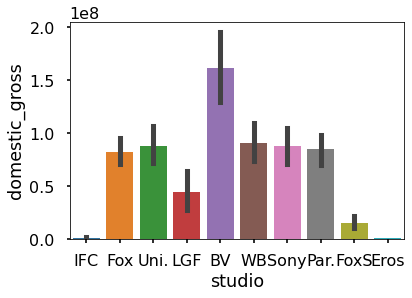

In [34]:
sns.barplot(data = joined_df, x='studio', y='domestic_gross');

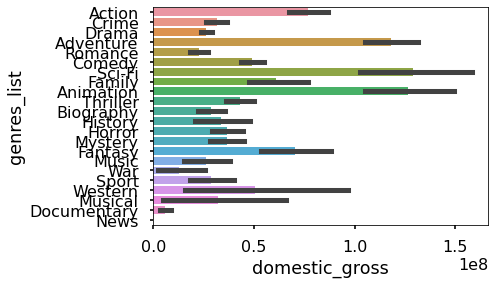

In [36]:
sns.barplot(data = genre_df, y='genres_list', x='domestic_gross');

- Out of the top 10 studios, Disney(BV) makes the most domestic gross on average.
- I recommend Microsoft mimic Disney's business practices as much as possible.

In [38]:
# # Here you run your code to clean the data
# df1.drop_duplicates()
# df2.drop_duplicates()
# joined_df = pd.merge(df1, df2, on='tconst', how='inner') #These two tables are merged by common id number.
# joined_df.sort_values((['numvotes', 'averagerating']), ascending=[False, False]).head(50) #This code sorts by the number of votes casted
# joined_df = joined_df[joined_df['numvotes'] > 500000].sort_values(('numvotes'), ascending = [False]) 
# #in order to filter down the number of movies, i implemented code that only shows movies with over 500,000 votes. source: https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression

# joined_df = joined_df[joined_df['averagerating'] > 7.5].sort_values(('averagerating'), ascending = [False])
# joined_df = joined_df.head(20)
# joined_df = joined_df.drop(columns = ['tconst', 'start_year', 'runtime_minutes', 'original_title'])
# joined_df

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

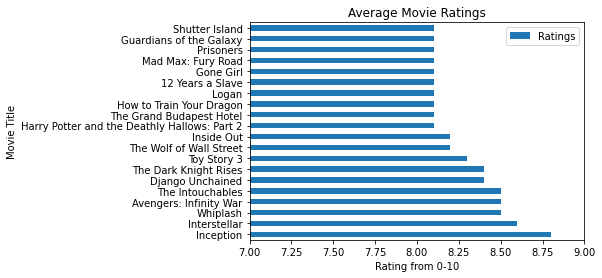

In [6]:
# Here you run your code to model the data
ax = joined_df.plot.barh('primary_title', 'averagerating');
ax.set_title('Average Movie Ratings');
ax.legend(['Ratings']);
ax.set_xlabel('Rating from 0-10')
ax.set_ylabel('Movie Title');
ax.set_xlim(7,9);

(300000000.0, 1000000000.0)

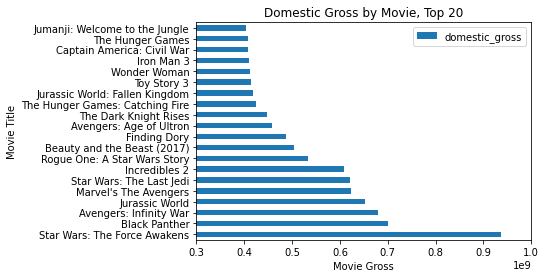

In [7]:
ax2 = df3.plot.barh('title', 'domestic_gross');
ax2.set_title('Domestic Gross by Movie, Top 20');
ax2.set_ylabel('Movie Title');
ax2.set_xlabel('Movie Gross');
ax2.set_xlim(3*1e8,10*1e8)

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***